# Part 1

Create a bar plot that shows distribution of german and british citizens in terms of age.

<BarContainer object of 90 artists>

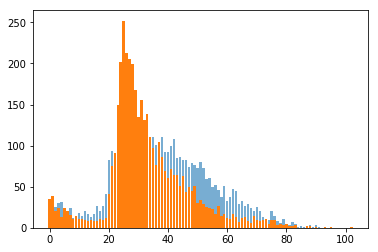

In [2]:
%matplotlib inline


import matplotlib.pyplot as plt
import kkdata
import pprint
import numpy as np

year_show = 2015 #Changes which year some graph will reflect

data = kkdata.STATISTICS


def age_count(c_code):
    res = {}
    for area in data[year_show]:
        for age in data[year_show][area]:
            for key, value in data[year_show][area][age].items():
                if key == c_code:
                    res.setdefault(age, 0)
                    res[age] += value
    return res

germany = 5180
gb = 5170

gb_data = age_count(gb)
germany_data = age_count(germany)

plt.figure()

plt.bar(gb_data.keys(), gb_data.values(), alpha=0.6)
plt.bar(germany_data.keys(), germany_data.values())


# Part 2
How many French are there compared to Germans and how are they distributed over various neighbourhoods?

''

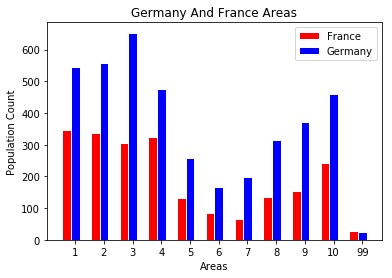

In [13]:
def create_population_count(c_code):
    res = {}
    for year in data:
        res.setdefault(year, {})
        for area in data[year]:
            res[year].setdefault(area, 0)
            for age in data[year][area]:
                for key, value in data[year][area][age].items():
                    if key == c_code:
                        res[year][area] += value
    return res

france = 5130
germany = 5180

france_data = create_population_count(france)
germany_data = create_population_count(germany)

plt.figure()

barWidth = 0.3
 
france_values = france_data[year_show].values()
german_values = germany_data[year_show].values()

# Set position of bar on X axis
r1 = np.arange(len(france_values))
r2 = [x + barWidth for x in r1]
 
# Make the plot
p1 = plt.bar(r1, france_values, color='red', width=barWidth, edgecolor='white')
p2 = plt.bar(r2, german_values, color='blue', width=barWidth, edgecolor='white')
 

plt.xticks([r + barWidth for r in range(len(france_values))], france_data[year_show].keys())
plt.title("Germany And France Areas")
plt.xlabel("Areas")
plt.ylabel("Population Count")
plt.legend((p1[0], p2[0]), ('France', 'Germany'))

''

# Part 3
Create a pie chart showing the 5 major citizen groups of age between 20-65

''

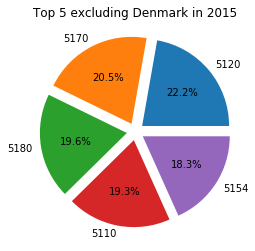

In [11]:
pie_data = {}

for year in data:
    pie_data.setdefault(year, {})
    for area in data[year]:
        for age in data[year][area]:
            if not 20 < age < 65:
                continue
            for key, value in data[year][area][age].items():
                if key not in pie_data[year]:
                    pie_data[year].setdefault(key, 0)
                pie_data[year][key] += value


del pie_data[year_show][5100] # removes Denmark because otherwise its a boring pie ;) 

#Sorts and takes the 5 biggest nations
major_5_pie_chart_dict = {x: pie_data[year_show][x] for x in sorted(
    pie_data[year_show], key=pie_data[year_show].get, reverse=True)[:5]}

plt.figure()

plt.title("Top 5 excluding Denmark in " + str(year_show))
plt.pie(major_5_pie_chart_dict.values(),
        labels=major_5_pie_chart_dict.keys(), autopct='%1.1f%%',
        explode=(0.1, 0.1, 0.1, 0.1, 0.1))
''

# Part 4
(red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.

In [17]:
import json
import requests
import urllib
import folium


def get_city_location(city='Copenhagen'):
    """Get the location coordinates from OpenStreetMaps"""
    url_nomatim_api = 'https://nominatim.openstreetmap.org/search'
    r = requests.get(url_nomatim_api, params={'format': 'json', 'city': 'Copenhagen'})
    results = r.json()  # Potentially many matches
    #print('results: ',results)
    location = results[0]
    lat, lon = float(location['lat']), float(location['lon'])
    return lat, lon


def get_geojson(url):
    response = requests.get(url)
    geo_json = response.json()
    return geo_json


cph_lat, cph_lon = get_city_location()
url_environ = 'http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request='\
              'GetFeature&typeName=k101:miljozone&outputFormat=json&SRSNAME=EPSG:4326'
geo_json = get_geojson(url_environ) # contains attribute: geometri: type: multipolygon
map_osm = folium.Map(location=(cph_lat, cph_lon), zoom_start=10) # here we draw the map.
folium.GeoJson(geo_json, name='geojson').add_to(map_osm)         # here we plot the environmental zone 1

cor_list = geo_json["features"][0]["geometry"]["coordinates"][0][0] # get coordinates array
for cor in cor_list:
    folium.Marker([cor[1], cor[0]], popup="<b> {} </b>".format([cor[1], cor[0]])).add_to(map_osm)

map_osm